# TP Concurrente - Analisis de resultados de los escenarios

In [29]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_theme(style="whitegrid")
sns.set_palette(sns.color_palette("Set2"))


## Cargamos los tiempos de ejecución de cada uno de los escenarios 

In [44]:
colnames = ["Fine Grained List", "Optimistic List", "Lock-Free List"]
escenario1 = pd.read_csv("src/logs/timeEscenario1.txt", sep = " ", names = colnames)
escenario2 = pd.read_csv("src/logs/timeEscenario2.txt", sep = " ", names = colnames)
escenario3 = pd.read_csv("src/logs/timeEscenario3.txt", sep = " ", names = colnames)
escenario4 = pd.read_csv("src/logs/timeEscenario4.txt", sep = " ", names = colnames)
escenario5 = pd.read_csv("src/logs/timeEscenario5.txt", sep = " ", names = colnames)
escenario6 = pd.read_csv("src/logs/timeEscenario6.txt", sep = " ", names = colnames)
escenario7 = pd.read_csv("src/logs/timeEscenario7.txt", sep = " ", names = colnames)
escenario8 = pd.read_csv("src/logs/timeEscenario8.txt", sep = " ", names = colnames)

Generamos gráficos con esos datos

Text(0.5, 1.0, 'Execution Time escenario1')

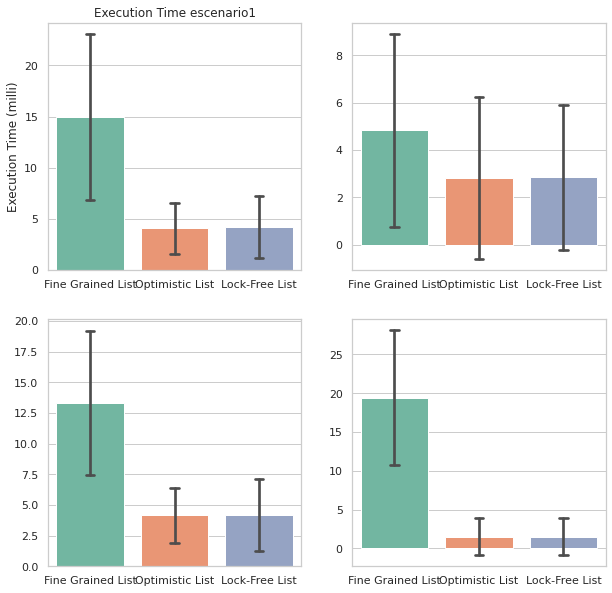

In [51]:
fig, ax = plt.subplots(2, 2,figsize= (10, 10))

sns.barplot(escenario1, estimator= 'mean', errorbar = 'sd', n_boot=1000, ax = ax[0,0], capsize= 0.1, errcolor=".3")
sns.barplot(escenario2, estimator= 'mean', errorbar = 'sd', n_boot=1000, ax = ax[0,1], capsize= 0.1, errcolor=".3")
sns.barplot(escenario3, estimator= 'mean', errorbar = 'sd', n_boot=1000, ax = ax[1,0], capsize= 0.1, errcolor=".3")
sns.barplot(escenario4, estimator= 'mean', errorbar = 'sd', n_boot=1000, ax = ax[1,1], capsize= 0.1, errcolor=".3")

ax[0, 0].set_ylabel("Execution Time (milli)")
ax[0, 0].set_title("Execution Time escenario1")